In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline
import math
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
combine=[train,test]
sub=pd.read_csv("gender_submission.csv")
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Data Analysis

RangeIndex(start=0, stop=891, step=1)


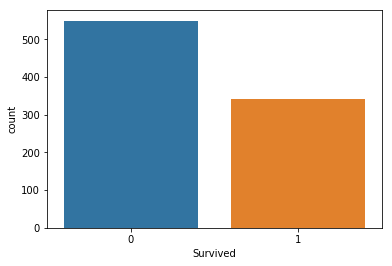

In [3]:
print(train.index)
sns.countplot(x='Survived',data=train)

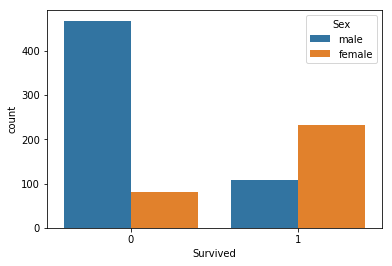

In [4]:
sns.countplot(x="Survived",hue="Sex",data=train)

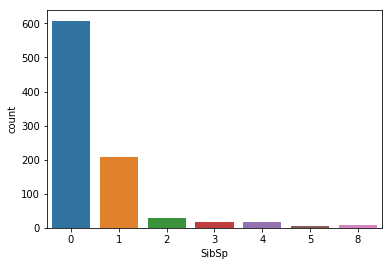

In [5]:
sns.countplot(x="SibSp",data=train)

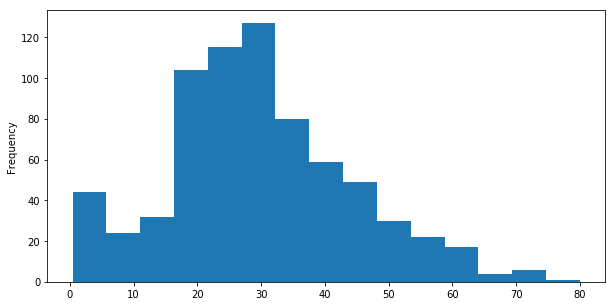

In [6]:
train['Age'].plot.hist(figsize=(10,5),bins=15)

#Data Wrangling

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [1]:
sns.heatmap(train.isnull(),yticklabels=False,cmap="viridis")

NameError: name 'sns' is not defined

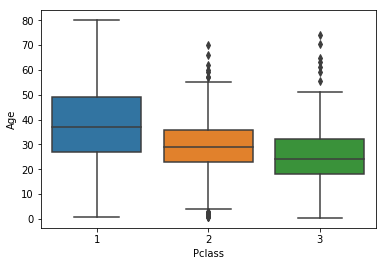

In [9]:
sns.boxplot(x="Pclass",y="Age",data=train)
#train.dtypes

In [10]:
train.drop("Cabin",axis=1,inplace=True)

In [11]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [12]:
#train.dropna(inplace=True)

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [14]:
#sex =pd.get_dummies(train['Sex'],drop_first=True)
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,C


In [15]:

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'C': 1, 'Q': 2, 'S': 3} ).fillna(1.0).astype(int)


train.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,3


In [16]:
train['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [17]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,3,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,3,Miss


In [18]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,3,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,3,Miss


In [19]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,3,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,3,Miss


In [20]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,3,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,3,2


In [21]:
train.drop(["PassengerId","Ticket","Name"],axis=1,inplace =True)
train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,3,1
1,1,1,1,38.0,1,0,71.2833,1,3
2,1,3,1,26.0,0,0,7.9250,3,2


In [22]:
test.drop(["PassengerId","Ticket","Name","Cabin"],axis=1,inplace =True)
test.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34.5,0,0,7.8292,2,1
1,3,1,47.0,1,0,7.0000,3,3
2,2,0,62.0,0,0,9.6875,2,1


In [23]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare']
    





In [24]:
train['Fare']=train['Fare'].astype(int)
test['Fare']=test['Fare'].fillna(0).astype(int)


In [25]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 4



In [26]:
train['Age']=train['Age'].fillna(1).astype(int)
test['Age']=test['Age'].fillna(1).astype(int)

In [27]:
train.head(30)
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
train.head(30)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age*Class
0,0,3,0,1,1,0,0,3,1,3
1,1,1,1,2,1,0,3,1,3,2
2,1,3,1,1,0,0,1,3,2,3
3,1,1,1,2,1,0,3,3,3,2
4,0,3,0,2,0,0,1,3,1,6
5,0,3,0,1,0,0,1,2,1,3
6,0,1,0,3,0,0,3,3,1,3
7,0,3,0,0,3,1,2,3,4,0
8,1,3,1,1,0,2,1,3,3,3
9,1,2,1,0,1,0,2,1,3,0


In [28]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age*Class,FamilySize
0,0,3,0,1,1,0,0,3,1,3,2
1,1,1,1,2,1,0,3,1,3,2,2
2,1,3,1,1,0,0,1,3,2,3,1
3,1,1,1,2,1,0,3,3,3,2,2
4,0,3,0,2,0,0,1,3,1,6,1
5,0,3,0,1,0,0,1,2,1,3,1
6,0,1,0,3,0,0,3,3,1,3,1
7,0,3,0,0,3,1,2,3,4,0,5
8,1,3,1,1,0,2,1,3,3,3,3
9,1,2,1,0,1,0,2,1,3,0,2


In [29]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1
train.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Age*Class,FamilySize,IsAlone
0,0,3,0,1,1,0,0,3,1,3,2,0
1,1,1,1,2,1,0,3,1,3,2,2,0
2,1,3,1,1,0,0,1,3,2,3,1,1
3,1,1,1,2,1,0,3,3,3,2,2,0
4,0,3,0,2,0,0,1,3,1,6,1,1
5,0,3,0,1,0,0,1,2,1,3,1,1
6,0,1,0,3,0,0,3,3,1,3,1,1
7,0,3,0,0,3,1,2,3,4,0,5,0
8,1,3,1,1,0,2,1,3,3,3,3,0
9,1,2,1,0,1,0,2,1,3,0,2,0


In [30]:
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train, test]


In [31]:
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Age*Class,IsAlone
0,0,3,0,1,0,3,1,3,0
1,1,1,1,2,3,1,3,2,0
2,1,3,1,1,1,3,2,3,1
3,1,1,1,2,3,3,3,2,0
4,0,3,0,2,1,3,1,6,1
5,0,3,0,1,1,2,1,3,1
6,0,1,0,3,3,3,1,3,1
7,0,3,0,0,2,3,4,0,0
8,1,3,1,1,1,3,3,3,0
9,1,2,1,0,2,1,3,0,0


# Logistic Regression

In [32]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
sub.drop('PassengerId',axis=1,inplace=True)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
logmodel=LogisticRegression()

In [35]:
logmodel.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Prediction using Logistic regression

In [36]:
predictions=logmodel.predict(test)

### Measuring Metrices

In [37]:
from sklearn.metrics import classification_report

In [38]:
classification_report(sub,predictions) #here sub is the sample output not original output

'             precision    recall  f1-score   support\n\n          0       0.96      0.95      0.96       266\n          1       0.92      0.93      0.93       152\n\navg / total       0.95      0.95      0.95       418\n'

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(sub,predictions)

array([[254,  12],
       [ 10, 142]], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(sub["Survived"],predictions)
acc_log = round(logmodel.score(X_train, Y_train) * 100, 2)
acc_log

80.58

# Random Forest

In [43]:
#Randomforest
random_forest = RandomForestClassifier(n_estimators=30)
random_forest.fit(X_train, Y_train)
pred = random_forest.predict(test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest
#accuracy_score(sub["Survived"],pred)
#confusion_matrix(sub,pred)

86.87

# Decision Tree

In [44]:
#decision tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

86.87

# KNN

In [45]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
knn_pred = knn.predict(test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.95

# Linear SVC

In [46]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
svc_pred = linear_svc.predict(test)
#accuracy_score(sub["Survived"],svc_pred)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.24

In [47]:
confusion_matrix(sub,svc_pred)

array([[255,  11],
       [  1, 151]], dtype=int64)

# Naive Bayes with GaussianNB

In [48]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
nb_pred = gaussian.predict(test)
accuracy_score(sub["Survived"],nb_pred)

0.8564593301435407

# Stochastic Gradient Descent Classifier

In [49]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
sgd_pred = sgd.predict(test)
accuracy_score(sub["Survived"],sgd_pred)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.7655502392344498

In [50]:
sub1=pd.read_csv("gender_submission.csv")
sub1.head(10)
passid=sub1.PassengerId


In [51]:
df1= pd.DataFrame(passid)
df1["Survived"]= predictions
df1.to_csv("svoutput.csv",index=False)